In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import fetch_openml
import pickle
from scipy.special import expit
from sklearn.model_selection import train_test_split

## Open MNIST data and create a subset with desired digits
MNIST dataset contains 70,000 images of hand-written digits from 0 to 9. Each image has a grey-scale resolution of 28 $\times$ 28 (i.e., 784 pixels). Each pixel has an integer value ranging from 0 (bright) to 255 (dark).

<font color=red>Change the code below to select a different subset </font>

In [3]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
y = np.asarray([int(numeric_string) for numeric_string in y])

# Change the conditions below to compare between other two digits.
class1Indices = (y==0)
class2Indices = (y==1)

x1 = X[class1Indices]
x2 = X[class2Indices]

Xtrain = np.concatenate((x1,x2),axis=0)
ytrain = np.concatenate((np.zeros(x1.shape[0]),np.ones(x2.shape[0])),axis=0)

# Saving the temporary variables for fast retrieval
with open('temp.pickle', 'wb') as handle:
    pickle.dump([Xtrain, ytrain], handle)



C:\Users\ruoqi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


# Split the data to training, testing, and validation subsets

In [4]:
# loading the temporary variables for fast retrieval
with open('temp.pickle', 'rb') as handle:
    Xtrain, ytrain = pickle.load(handle)
    
# Split the data to training, testing, and validation subsets
    
X_train, X_test, y_train, y_test = train_test_split(Xtrain, ytrain, test_size=0.3, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.14, random_state=1) # 0.25 x 0.8 = 0.2


Nsamples = X_train.shape[0]
Nfeatures = X_train.shape[1]

print("Number of samples: ", Nsamples)
print("Number of features: ", Nfeatures)


Number of samples:  8897
Number of features:  784


In [5]:
print(X_train.shape)
print(y_train.shape)
print()

(8897, 784)
(8897,)



# Accuracy of a classifier

In [6]:
def testLinearClassifier(a,X,y):

    misclassifications = 0
    
    # YOUR CODE HERE
    y_pred = X @ a[:-1] + a[-1] 
    # y_pred = X @ a[0:] + a[0]
    # check how many misclassifications
    y_pred[y_pred >= 0] = 1
    y_pred[y_pred < 0] = 0
    misclassifications = np.sum(y_pred != y)
    
    return misclassifications


## Define and test gaussianClassifierWithIdentityCovariance 

(785,)
64
9
36


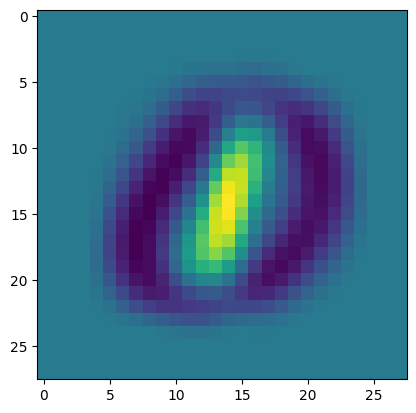

In [7]:
#------TRAINING CODE --------------

def gaussianClassifierWithIdentityCovariance(Xtrain,ytrain):
    
    u1 = np.mean(Xtrain[ytrain==0],axis=0)
    u2 = np.mean(Xtrain[ytrain==1],axis=0)

    

    W_t = (u2-u1).T
    # print(W_t.shape)
    W_0 = - W_t @ (u1+u2)/2

    a = np.concatenate((W_t, W_0), axis=None)
    

    
    return a


#------SIMPLE TESTING ON THE TRAINING DATA ITSELF --------------
a = gaussianClassifierWithIdentityCovariance(X_train,y_train)
print(a.shape)
plt.imshow(np.reshape(a[0:784],(28,28)))

train = testLinearClassifier(a,X_train,y_train)
val = testLinearClassifier(a,X_val,y_val)
test = testLinearClassifier(a,X_test,y_test)

print(train)
print(val)
print(test)




## Define and test gaussianClassifierWithCommonCovariance 

86
16
44


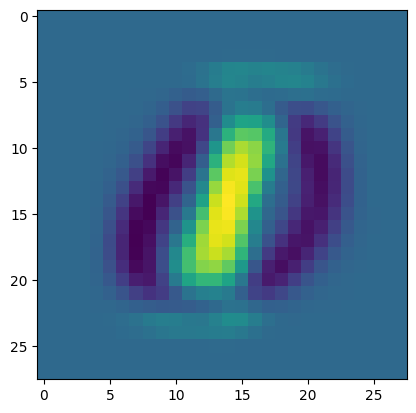

In [8]:
#------TRAINING CODE --------------

def gaussianClassifierWithCommonCovariance(Xtrain,ytrain):

    u1 = np.mean(Xtrain[ytrain==0],axis=0)
    u2 = np.mean(Xtrain[ytrain==1],axis=0)
    # Create mean subtracted images
    e1 = x1 - u1
    e2 = x2 - u2

    # Compute the combined covariance matrix, assuming it to be diagonal

    e12 = np.concatenate((e1,e2),axis=0)
    std = np.std(e12,axis=0)

    # print(std.shape)

    sigma = std**2
    sigma = sigma +  1e-6 * np.eye(sigma.shape[0])
    sigma_inv = np.linalg.inv(sigma)


    W_t = (u2-u1).T @ sigma_inv
    # print(W_t.shape)
    W_0 = - W_t @ (u1+u2)/2

    a = np.concatenate((W_t, W_0), axis=None)
    
    return a
    #YOUR CODE HERE

    
#------SIMPLE TESTING ON THE TRAINING DATA ITSELF --------------
a = gaussianClassifierWithCommonCovariance(X_train,y_train)
plt.imshow(np.reshape(a[0:784],(28,28)))

train = testLinearClassifier(a,X_train,y_train)
val = testLinearClassifier(a,X_val,y_val)
test = testLinearClassifier(a,X_test,y_test)

print(train)
print(val)
print(test)


## Define and test logisticRegression 

You may choose the step size as 1e-4. You can try changing it.

Use the expit() function from scipy.special.expit to implement sigmoid without overflow errors 

7
0
4


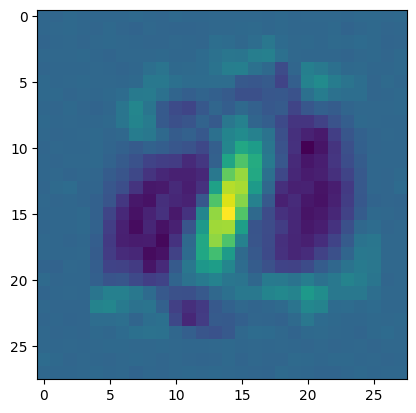

In [9]:
def logisticRegression(Xtrain,ytrain,iterations=100,step_size=1e-4,verbose=False):

    # Nsamples = Xtrain.shape[0] = 8897
    # Nfeatures = Xtrain.shape[1] = 784
    # initialize the weights
    a = np.random.randn(Xtrain.shape[1]+1)
    # print("a shape", a.shape)
    X_tilda = np.concatenate((Xtrain,np.ones((Xtrain.shape[0],1))),axis=1)
    # print("x_tilda shape", X_tilda.shape)

    s = expit(X_tilda @ a)
    # print("s shape", s.shape)

    # print("ytrain shape", ytrain.shape)

    for i in range(iterations):
        s = expit(X_tilda @ a)
        a = a - step_size * X_tilda.T @ (s-ytrain)
    
    return a
    #YOUR CODE HERE
    
#------SIMPLE TESTING ON THE TRAINING DATA ITSELF --------------
a = logisticRegression(X_train,y_train,iterations=500,verbose=False)
plt.imshow(np.reshape(a[0:784],(28,28)))

train = testLinearClassifier(a,X_train,y_train)
val = testLinearClassifier(a,X_val,y_val)
test = testLinearClassifier(a,X_test,y_test)

print(train)
print(val)
print(test)



In [10]:
# create a 2*3 matrix of 1s
test_x = np.ones((2,3))
print(test_x)
print(test_x.shape)

[[1. 1. 1.]
 [1. 1. 1.]]
(2, 3)


8
0
4


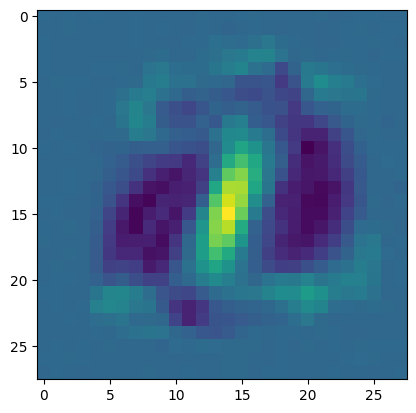

In [11]:
def logisticRegressionWithRegularization(Xtrain,ytrain,iterations=100,step_size=1e-4,lam=0,verbose=False):


    # Nsamples = Xtrain.shape[0] = 8897
    # Nfeatures = Xtrain.shape[1] = 784
    # initialize the weights
    a = np.random.randn(Xtrain.shape[1]+1)
    # print("a shape", a.shape)
    X_tilda = np.concatenate((Xtrain,np.ones((Xtrain.shape[0],1))),axis=1)
    # print("x_tilda shape", X_tilda.shape)

    s = expit(X_tilda @ a)
    # print("s shape", s.shape)

    # print("ytrain shape", ytrain.shape)

    for i in range(iterations):
        s = expit(X_tilda @ a)
        gradient_regularization = 2 * lam * a 
        a = a - step_size * (X_tilda.T @ (s-ytrain) + gradient_regularization)
    
    return a
    #YOUR CODE HERE

    
#------SIMPLE TESTING ON THE TRAINING DATA ITSELF --------------
a = logisticRegressionWithRegularization(X_train,y_train,iterations=500,verbose=False,lam=1)
plt.imshow(np.reshape(a[0:784],(28,28)))

train = testLinearClassifier(a,X_train,y_train)
val = testLinearClassifier(a,X_val,y_val)
test = testLinearClassifier(a,X_test,y_test)

print(train)
print(val)
print(test)



optimal lambda 0.0
10
0
4


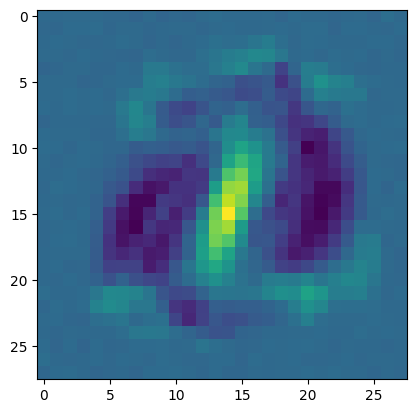

In [12]:
def optimizeHyperparameters(Xtrain,ytrain):
     
    # lambda from -10 to 10, 21 values
    lambda_list = np.linspace(0,10,21)

    iterations = 500
    step_size = 1e-4

    a_list = []
    misclassifications = []
    min_misclassifications = 0
    min_index = 0
    
    a = np.random.randn(Xtrain.shape[1]+1)
    
    X_tilda = np.concatenate((Xtrain,np.ones((Xtrain.shape[0],1))),axis=1)

    # loop through all lambda values
    for i in range(lambda_list.shape[0]):

        # find a for each lambda
        for j in range(iterations):
            s = expit(X_tilda @ a)
            gradient_regularization = 2 * lambda_list[i] * a 
            a = a - step_size * (X_tilda.T @ (s-ytrain) + gradient_regularization)

        # store a and misclassifications
        a_list.append(a)
        misclassifications.append(testLinearClassifier(a,X_val,y_val))

        # find the minimum misclassifications
        if(i == 0):
            min_misclassifications = misclassifications[i]
        else:
            if(misclassifications[i] < min_misclassifications):
                min_misclassifications = misclassifications[i]
                min_index = i

    lamopt = lambda_list[min_index]
        
    return lamopt

my_lamopt = optimizeHyperparameters(X_train,y_train)
print("optimal lambda", my_lamopt)
a = logisticRegressionWithRegularization(X_train,y_train,iterations=500,verbose=False,lam=my_lamopt)
plt.imshow(np.reshape(a[0:784],(28,28)))

train = testLinearClassifier(a,X_train,y_train)
val = testLinearClassifier(a,X_val,y_val)
test = testLinearClassifier(a,X_test,y_test)

print(train)
print(val)
print(test)




# REPORT TEST ERRORS OF THE BEST MODELS

YOUR CODE BELOW

In [13]:
# compare all above methods
a_list = []

a1 = gaussianClassifierWithIdentityCovariance(X_train,y_train)
a2 = gaussianClassifierWithCommonCovariance(X_train,y_train)
a3 = logisticRegression(X_train,y_train,iterations=500,verbose=False)
a4 = logisticRegressionWithRegularization(X_train,y_train,iterations=500,verbose=False,lam=-4.5)

a_list.append(a1)
a_list.append(a2)
a_list.append(a3)
a_list.append(a4)

train_list = []
val_list = []
test_list = []

for i in range(len(a_list)):
    train_list.append(testLinearClassifier(a_list[i],X_train,y_train))
    val_list.append(testLinearClassifier(a_list[i],X_val,y_val))
    test_list.append(testLinearClassifier(a_list[i],X_test,y_test))

print("a1, a2, a3, a4")
print("train", train_list)
print("val", val_list)
print("test", test_list)




a1, a2, a3, a4
train [64, 86, 6, 13]
val [9, 16, 0, 0]
test [36, 44, 4, 6]
